In [1]:
import pandas as pd
import csv

import subprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from csv_load import * # Trial class is in this mod

#

# 1. Raw files version

## Loading a 'practice' file
Here some files paths are selected to obtain our first analyses and visualisations.

In [2]:
# The first rows don't include tracking data -> skiprows of the whole header

reaching = "../files/utf8/Visually_Guided_Reaching_-_[Child_v2_-_practice]_-_LEFT_-_11_49.csv"
reaching2 = "../files/utf8/Visually_Guided_Reaching_-_Child_v2_(4_target)_-_LEFT_-_11_50.csv"
practice_ball = "../files/utf8/Ball_on_Bar_-_[Child_-_practice_2_(30s_per_level)]_-_RIGHT_-_11_57.csv"
ball = "../files/utf8/Ball_on_Bar_-_Child_-_RIGHT_-_11_59.csv"
practice_object = "../files/utf8/Object_Hit_-_[Child_-_practice]_-_RIGHT_-_12_02.csv"
circuit = "../files/utf8/Circuit_Exo_-_[b_Circuit1_(youngerchildren)]_-_RIGHT_-_12_09.csv"
circuit2 = "../files/utf8/Circuit_Exo_-_[c_Circuit1_rotated_(youngerchildren)]_-_RIGHT_-_12_11.csv"
circuit3 = "../files/utf8/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_12_05.csv"

files = [reaching, reaching2, practice_ball, practice_ball, ball, practice_object, circuit, circuit2, circuit3]

In [3]:
frame = pd.read_csv(circuit,encoding= 'utf8', sep=',', low_memory=False,
                        skiprows = 328, nrows=64682 - 328 - 17)         # total file line count - header - 17 lineskip 

frame[['Gaze_Vector_X','Gaze_Vector_Y', 'Gaze_Vector_Z']]

Gaze_Vector_X  Gaze_Vector_Y  Gaze_Vector_Z
0           0.181772       0.770335      -0.611182
1           0.181725       0.770381      -0.611137
2           0.181725       0.770381      -0.611137
3           0.181435       0.770417      -0.611179
4           0.181435       0.770417      -0.611179
...              ...            ...            ...
63183      -0.250941       0.756324      -0.604154
63184      -0.251505       0.756253      -0.604009
63185      -0.251505       0.756253      -0.604009
63186      -0.251317       0.756209      -0.604143
63187      -0.251317       0.756209      -0.604143

[63188 rows x 3 columns]

In [4]:
dfs = extract_dataframes(reaching)
for i in range(len(dfs)):
    print("Trial #: ", i)
    trial = Trial(dfs[i], name = i, filter = None)
    print("Size of events list: ",len(set(trial.event_list)))
    print("Unique events: ",[i for i in set(trial.event_list)], "\n ___________")


Trial #:  0
Size of events list:  10
Unique events:  ['EXIT_START_TARGET', 'HOLD_AT_TARGET', 'TARGET_ON', 'Gaze fixation end', 'Gaze fixation start', 'WAIT_FOR_START', 'Gaze saccade end', 'END_OF_REACH', 'STAY_CENTRE', 'Gaze saccade start'] 
 ___________
Trial #:  1
Size of events list:  9
Unique events:  ['EXIT_START_TARGET', 'HOLD_AT_TARGET', 'TARGET_ON', 'Gaze fixation end', 'Gaze fixation start', 'Gaze saccade end', 'END_OF_REACH', 'STAY_CENTRE', 'Gaze saccade start'] 
 ___________
Trial #:  2
Size of events list:  11
Unique events:  ['EXIT_START_TARGET', 'HOLD_AT_TARGET', 'TARGET_ON', 'Gaze blink start', 'Gaze fixation end', 'Gaze fixation start', 'Gaze blink end', 'Gaze saccade end', 'END_OF_REACH', 'STAY_CENTRE', 'Gaze saccade start'] 
 ___________


In [5]:
#set(trial.event_list)

## First plots

In [6]:
FILEPATH = practice_object
dataframe = pd.read_csv(FILEPATH,encoding= 'unicode_escape', sep=',',skiprows = 390, parse_dates=[0,1,2])

gazeX = dataframe['Gaze_X']
gazeY = dataframe['Gaze_Y']

Text(0.5, 1.0, 'Eye positions ObjectHit')

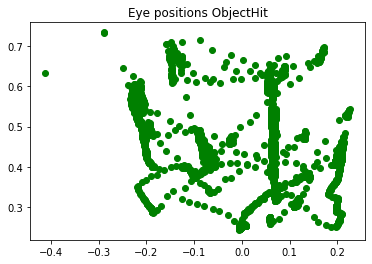

In [7]:
fig = plt.figure()
plt.plot(gazeX,gazeY,'go')
plt.title("Eye positions ObjectHit")
#plt.savefig('eye_position.svg')
#plt.show()

### Plot of eyes combined with both hands positions

In [8]:
# Time interval between frames(rows): 5ms

print('Total time of the practice (s):', dataframe['Frame time (s)'].iloc[-1])
#results['Frame time (s)'].iloc[-1] / 0.005
print('Time interval (refresh rate) between each rows (s):', dataframe['Sample duration (s)'].iloc[0])

Total time of the practice (s): 16.7299995
Time interval (refresh rate) between each rows (s): 0.005


In [9]:
#Reading the columns:
time = dataframe['Frame time (s)']
gazeX = dataframe['Gaze_X']
gazeY = dataframe['Gaze_Y']

# Right: Hand speed
rightX = dataframe['Right: Hand position X']
rightY = dataframe['Right: Hand position Y']
rightSpeed = dataframe['Right: Hand speed']
# Left hand
leftX = dataframe['Left: Hand position X']
leftY = dataframe['Left: Hand position Y']
leftSpeed = dataframe['Left: Hand speed']
    

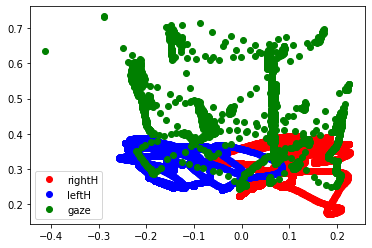

In [10]:
fig = plt.figure()

plt.plot(rightX,rightY,'ro', label='rightH')
plt.plot(leftX,leftY,'bo', label='leftH')
plt.plot(gazeX,gazeY,'go', label='gaze')

plt.legend()
plt.show()
#plt.savefig('all_position.svg')

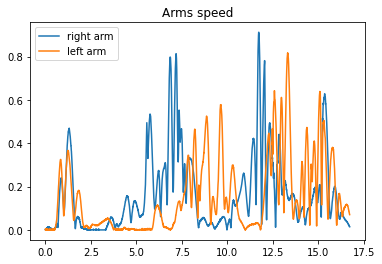

In [11]:
plt.plot(time, rightSpeed, label='right arm')
plt.plot(time, leftSpeed, label='left arm')
plt.title('Arms speed')
plt.legend()
#plt.savefig('arms_speed.svg')

## Events

In [12]:
# Relevant columns: 
# Event name
# Event time (s)

# 101 rows register an event
print("Number of rows registering an event: ",len(dataframe[dataframe['Event name'].notna()]))
print("Total rows (dataframe length): ", len(dataframe))


Number of rows registering an event:  101
Total rows (dataframe length):  3347


(array([3., 0., 0., ..., 0., 0., 0.]),
 array([0.00000000e+00, 4.99999989e-03, 9.99999978e-03, ...,
        1.67199993e+01, 1.67250004e+01, 1.67299995e+01]),
 [<matplotlib.patches.Polygon at 0x7fc63051b820>])

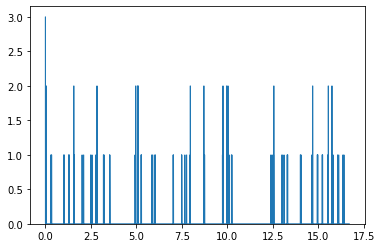

In [13]:
res_events = dataframe[dataframe['Event name'].notna()]
event_times = res_events['Event time (s)']
plt.hist(event_times, dataframe['Frame time (s)'], histtype='step')#, title='Events distribution')

## Trials identification and separation

CSV files typically contain several Trials, the first goal here is to automatically read the CSVs of an experience and extract the trials dataframes separately.

In [14]:
# practice example is from ball_on_bar exercise
practice_ball = "../files/utf8/Ball_on_Bar_-_[Child_-_practice_2_(30s_per_level)]_-_RIGHT_-_11_57.csv"
practice_object = "../files/utf8/Object_Hit_-_[Child_-_practice]_-_RIGHT_-_12_02.csv"
practice_reach = "../files/utf8/Visually_Guided_Reaching_-_[Child_v2_-_practice]_-_LEFT_-_11_49.csv"
practice_reach2 = "../files/utf8/Visually_Guided_Reaching_-_[Child_v2_-_practice]_-_RIGHT_-_11_47.csv"

ball = "../files/utf8/Ball_on_Bar_-_Child_-_RIGHT_-_11_59.csv"
object_hit = "../files/utf8/Object_Hit_-_Child_-_RIGHT_-_12_02.csv"

circuit = "../files/utf8/Circuit_Exo_-_[b_Circuit1_(youngerchildren)]_-_RIGHT_-_12_09.csv"
circuit2 = "../files/utf8/Circuit_Exo_-_[c_Circuit1_rotated_(youngerchildren)]_-_RIGHT_-_12_11.csv"
circuit3 = "../files/utf8/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_12_05.csv"

reaching = "../files/utf8/Visually_Guided_Reaching_-_Child_v2_(4_target)_-_LEFT_-_11_50.csv"


#object:     390       -3
#ball :      360       -6
#circuit :   328       -
#reaching:   336       -3



Line space problem, when reading the CSV with the pd.read_csv method, the header size difference between the file types has to be taken into account.  
examples: (requires to change 'skiprows' individually with the values cited above)

In [15]:
#FILEPATH = practice_object
#FILEPATH = practice_ball
#FILEPATH = object_hit
FILEPATH = circuit2
# The first rows don't include tracking data -> skiprows
results = pd.read_csv(FILEPATH,encoding= 'unicode_escape', sep=',',skiprows = 328, parse_dates=[0,1,2])
# Sorted by Frame number
results.head()

Trial # TP Row Block Row  Sample duration (s)  Sample count  \
0       1      1         1                0.001       62905.0   
1     NaN    NaN       NaN                  NaN           NaN   
2     NaN    NaN       NaN                  NaN           NaN   
3     NaN    NaN       NaN                  NaN           NaN   
4     NaN    NaN       NaN                  NaN           NaN   

               Event name  Event time (s) Video frame sent Video frame ACKed  \
0  TASK_BUTTON_15_CLICKED             0.0              NaN               NaN   
1      Gaze saccade start             0.0    Video Frame 0               NaN   
2                     NaN             NaN              NaN               NaN   
3                     NaN             NaN              NaN               NaN   
4                     NaN             NaN              NaN               NaN   

   Frame #  ...  Left: Shoulder angle  Left: Elbow angle  \
0        0  ...              0.203705           1.547694   
1        1  ...              0.203484           1.547560   
2        2  ...              0.203273           1.547406   
3        3  ...              0.203053           1.547272   
4        4  ...              0.202842           1.547138   

   Left: Shoulder velocity  Left: Elbow velocity  Left: Shoulder acceleration  \
0                -0.220510             -0.143811                -9.587379e+00   
1                -0.220510             -0.134223                -1.776357e-09   
2                -0.210922             -0.153398                 9.587379e+00   
3                -0.220510             -0.134223                -9.587379e+00   
4                -0.210922             -0.134223                 9.587379e+00   

   Left: Elbow acceleration  Left: Cmd shoulder torque  \
0                  9.587379                        0.0   
1                  9.587379                        0.0   
2                -19.174759                        0.0   
3                 19.174759                        0.0   
4                  0.000000                        0.0   

   Left: Cmd elbow torque  Video frame interval time  Video frame drop count  
0                     0.0                   7.999999                       0  
1                     0.0                   7.999999                       0  
2                     0.0                   7.999999                       0  
3                     0.0                   7.999999                       0  
4                     0.0                   7.999999                       0  

[5 rows x 82 columns]

Skipping the lines from a given 

### Extract dataframes first version

In [16]:
ENCODE = 'utf_8'
def extract_dataframesv1(file, offset=0):
    # Line detection
    trials = []
    with open(file, encoding=ENCODE) as infile:
        for cnt, line in enumerate(infile):
            if "Trial #" in line:
                #print("Line {}".format(cnt))
                trials.append(cnt)

        #print("Line end :", cnt)
        trials.append(cnt + 17)
        #process = subprocess.Popen(["wc", "-l", EXERCISE])#, "copy.sh"])
    # Dataframes
    dfs = []
    for i, j in enumerate(trials[:-1]):
        dfs.append(pd.read_csv(file,encoding= 'utf8', sep=',', low_memory=False,
                                skiprows = j-offset, nrows=trials[i+1]-trials[i] -17))

    return dfs

In [17]:
EXERCISE = ball
if EXERCISE[14] == 'B':
    dfs = extract_dataframesv1(EXERCISE, offset=6)
elif EXERCISE[14] == 'C':
    dfs = extract_dataframesv1(EXERCISE, offset=0)
elif EXERCISE[14] == 'O' or 'R' :
    dfs = extract_dataframesv1(EXERCISE, offset=3)


In [18]:
dfs[1]

Trial #  TP Row  Block Row  Sample duration (s)  Sample count  \
0          2.0     2.0        2.0                0.001       61899.0   
1          NaN     NaN        NaN                  NaN           NaN   
2          NaN     NaN        NaN                  NaN           NaN   
3          NaN     NaN        NaN                  NaN           NaN   
4          NaN     NaN        NaN                  NaN           NaN   
...        ...     ...        ...                  ...           ...   
61894      NaN     NaN        NaN                  NaN           NaN   
61895      NaN     NaN        NaN                  NaN           NaN   
61896      NaN     NaN        NaN                  NaN           NaN   
61897      NaN     NaN        NaN                  NaN           NaN   
61898      NaN     NaN        NaN                  NaN           NaN   

      Event name  Event time (s) Video frame sent Video frame ACKed  Frame #  \
0            NaN             NaN              NaN               NaN        0   
1            NaN             NaN              NaN               NaN        1   
2            NaN             NaN              NaN               NaN        2   
3            NaN             NaN              NaN               NaN        3   
4            NaN             NaN    Video Frame 0               NaN        4   
...          ...             ...              ...               ...      ...   
61894        NaN             NaN              NaN               NaN    61894   
61895        NaN             NaN              NaN               NaN    61895   
61896        NaN             NaN              NaN  Video Frame 7423    61896   
61897        NaN             NaN              NaN               NaN    61897   
61898        NaN             NaN              NaN               NaN    61898   

       ...  Left: Shoulder angle  Left: Elbow angle  Left: Shoulder velocity  \
0      ...              0.988096           0.970706                 0.488956   
1      ...              0.988576           0.969623                 0.479369   
2      ...              0.989046           0.968549                 0.469782   
3      ...              0.989525           0.967476                 0.479369   
4      ...              0.989995           0.966421                 0.469782   
...    ...                   ...                ...                      ...   
61894  ...              0.676622           1.356090                 0.680704   
61895  ...              0.677302           1.355544                 0.680704   
61896  ...              0.677983           1.354988                 0.680704   
61897  ...              0.678664           1.354441                 0.680704   
61898  ...              0.679344           1.353885                 0.680704   

       Left: Elbow velocity  Left: Shoulder acceleration  \
0                 -1.092961                 9.587379e+00   
1                 -1.083374                -9.587379e+00   
2                 -1.073787                -9.587379e+00   
3                 -1.073787                 9.587379e+00   
4                 -1.054612                -9.587379e+00   
...                     ...                          ...   
61894             -0.546481                 0.000000e+00   
61895             -0.546481                -8.881784e-10   
61896             -0.556068                 8.881784e-10   
61897             -0.546481                 0.000000e+00   
61898             -0.556068                 0.000000e+00   

       Left: Elbow acceleration  Left: Cmd shoulder torque  \
0                 -9.587379e+00                  -0.813206   
1                  9.587379e+00                  -0.805245   
2                  9.587379e+00                  -0.797132   
3                  0.000000e+00                  -0.789157   
4                  1.917476e+01                  -0.781282   
...                         ...                        ...   
61894              8.881784e-10                  -0.383442   
618

In [19]:
trial1 = Trial(dfs[0], name='trial1', filter=None)

#trial1.kinematics
#dfs[0]['Right: Hand position Y']

In [20]:
evt_list = list(dfs[0][dfs[0]['Event name'].notna()]['Event name'])
from collections import Counter
print(dict(Counter(evt_list)))

{'Gaze saccade start': 72, 'Gaze saccade end': 72, 'Gaze fixation start': 15, 'Gaze fixation end': 15, 'CENTRAL_TARGET_ON': 1, 'CENTRAL_TARGET_REACHED': 1, 'SECOND_TARGET_ON': 8, 'SECOND_TARGET_REACHED': 9, 'SECOND_TARGET_HELD': 8, 'THIRD_TARGET_ON': 8, 'THIRD_TARGET_REACHED': 9, 'THIRD_TARGET_HELD': 8, 'FOURTH_TARGET_ON': 8, 'FOURTH_TARGET_REACHED': 8, 'FOURTH_TARGET_HELD': 7, 'FIRST_TARGET_ON': 7, 'FIRST_TARGET_REACHED': 8, 'FIRST_TARGET_HELD': 7, 'Gaze blink start': 2, 'Gaze blink end': 2, 'FIRST_TARGET_EXITED': 1, 'THIRD_TARGET_EXITED': 1, 'SECOND_TARGET_EXITED': 1, 'FOURTH_TARGET_EXITED': 1}


The following code lists each saccade start, with its Frame time(s) and Frame #.  

In [21]:
df_event = dfs[0][dfs[0]['Event name'].notna()]
[tuple(x) for x in df_event.loc[df_event['Event name'] == 'Gaze saccade start'][['Frame #','Event time (s)']].values][:5]

[(256.0, 0.256000012),
 (655.0, 0.654999971),
 (1460.0, 1.46000004),
 (1632.0, 1.63199997),
 (1897.0, 1.89699996)]

# 2. Compressed raw files

## Saving all the trials as pickle dataframes for faster load

This way all data from the files can be extracted and re-used without uploading the large CSVs

In [22]:
## This block is not used if you're using the uploaded repo, you already have the pickle files
import pickle, blosc, os

pickledir = "../files/pickles/1/"
DIR = "../files/utf8/"
FILES = []
for root, dir, files in os.walk(DIR, topdown=False):
    for file in sorted(files):
        FILES.append(os.path.join(root, file))

for f in FILES:
    print("Compressing file : ", f, end="              ")
    data = extract_dataframes(f)
    print("File contains {} trials.".format(len(data)))
    pickled_data = pickle.dumps(data)  # returns data as a bytes object
    compressed_pickle = blosc.compress(pickled_data)
    with open(pickledir+f[13:-4]+".pickle", "wb") as f:
        f.write(compressed_pickle)

Compressing file :  ../files/utf8/Ball_on_Bar_-_Child_-_RIGHT_-_11_59.csv              File contains 3 trials.
Compressing file :  ../files/utf8/Ball_on_Bar_-_[Child_-_practice_2_(30s_per_level)]_-_RIGHT_-_11_57.csv              File contains 2 trials.
Compressing file :  ../files/utf8/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_12_05.csv              File contains 1 trials.
Compressing file :  ../files/utf8/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_12_08.csv              File contains 1 trials.
Compressing file :  ../files/utf8/Circuit_Exo_-_[b_Circuit1_(youngerchildren)]_-_RIGHT_-_12_09.csv              File contains 1 trials.
Compressing file :  ../files/utf8/Circuit_Exo_-_[c_Circuit1_rotated_(youngerchildren)]_-_RIGHT_-_12_11.csv              File contains 1 trials.
Compressing file :  ../files/utf8/Object_Hit_-_Child_-_RIGHT_-_12_02.csv              File contains 1 trials.
Compressing file :  ../files/utf8/Object_Hit_-_[Child_-_pra

And in order to read the compressed files:

In [23]:
with open("../files/pickles/1/Ball_on_Bar_-_[Child_-_practice_2_(30s_per_level)]_-_RIGHT_-_11_57.pickle", "rb") as f:
    compressed_pickle = f.read()

depressed_pickle = blosc.decompress(compressed_pickle)
dataframes = pickle.loads(depressed_pickle)
print("Object contains {} dataframes, first dataframe :".format(len(dataframes)))
dataframes[0].head(4)


Object contains 2 dataframes, first dataframe :


Trial #  TP Row  Block Row  Sample duration (s)  Sample count Event name  \
0      1.0     1.0        1.0                0.001       36015.0        NaN   
1      NaN     NaN        NaN                  NaN           NaN        NaN   
2      NaN     NaN        NaN                  NaN           NaN        NaN   
3      NaN     NaN        NaN                  NaN           NaN        NaN   

   Event time (s) Video frame sent Video frame ACKed  Frame #  ...  \
0             NaN              NaN               NaN        0  ...   
1             NaN    Video Frame 0               NaN        1  ...   
2             NaN              NaN               NaN        2  ...   
3             NaN              NaN               NaN        3  ...   

   Left: Shoulder angle  Left: Elbow angle  Left: Shoulder velocity  \
0               0.24217           1.797675                -0.009587   
1               0.24216           1.797685                -0.009587   
2               0.24216           1.797685                 0.000000   
3               0.24215           1.797695                -0.009587   

   Left: Elbow velocity  Left: Shoulder acceleration  \
0              0.009587                 0.000000e+00   
1              0.009587                -8.881784e-10   
2              0.000000                 9.587379e+00   
3              0.009587                -9.587379e+00   

   Left: Elbow acceleration  Left: Cmd shoulder torque  \
0             -1.776357e-09                        0.0   
1              1.776357e-09                        0.0   
2             -9.587379e+00                        0.0   
3              9.587379e+00                        0.0   

   Left: Cmd elbow torque  Video frame interval time  Video frame drop count  
0                     0.0                   8.000001                       0  
1                     0.0                   8.000001                       0  
2                     0.0                   8.000001                       0  
3                     0.0                   8.000001                       0  

[4 rows x 102 columns]

The compressed pickles directly contained the dataframes of each exercices trials as a list.  

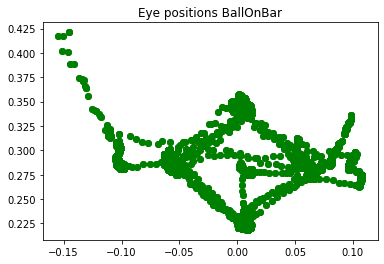

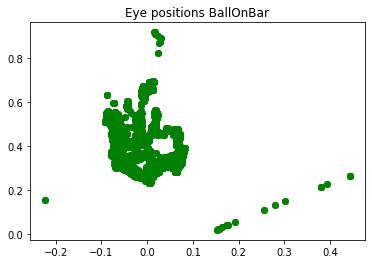

In [24]:
for df in dataframes:
    gazeX = df['Gaze_X']
    gazeY = df['Gaze_Y']
    fig = plt.figure()
    plt.plot(gazeX,gazeY,'go')
    plt.title("Eye positions BallOnBar")